In [15]:
from gc import collect
from os.path import join

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy
import scienceplots  # noqa
from cache_to_disk import cache_to_disk, delete_disk_caches_for_function
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.stats import kendalltau
from tqdm import tqdm, trange

import csiborgtools
import plt_utils


import plot_match
%matplotlib widget
%load_ext autoreload
%autoreload 2

paths = csiborgtools.read.Paths(**csiborgtools.paths_glamdring)
ext = "png"
to_save = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## $M_{\rm tot}$ - all pair overlaps

Stacking the results of a single reference simulation with the other boxes.

In [3]:
nsim0 = 7444
simname = "csiborg"
mass_kind = "fof_totpartmass"
min_logmass = 13.0
smoothed = True


cat0 = plot_match.open_cat(nsim0, simname)
nsimxs = csiborgtools.read.get_cross_sims(simname, nsim0, paths, min_logmass, smoothed=smoothed)
catxs = plot_match.open_cats(nsimxs, simname)

reader = csiborgtools.read.NPairsOverlap(cat0, catxs, paths, min_logmass)

x = [None] * len(catxs)
y = [None] * len(catxs)
for i in trange(len(catxs), desc="Stacking catalogues"):
    x[i] = numpy.log10(numpy.concatenate(reader[i].copy_per_match(mass_kind)))
    y[i] = numpy.concatenate(reader[i].overlap(True))

    mask = y[i] > 0
    x[i] = x[i][mask]
    y[i] = y[i][mask]

x = numpy.concatenate(x)
y = numpy.concatenate(y)

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
Opening catalogues: 2it [00:04,  2.38s/it]
Stacking catalogues: 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]


Saving to `../plots/mass_vs_pair_overlap_csiborg_7444.png`.


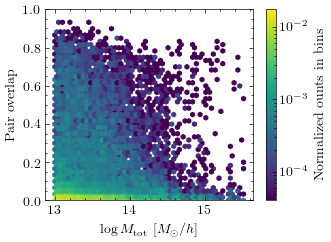

In [11]:
with plt.style.context(plt_utils.mplstyle):
    plt.figure()
    hb = plt.hexbin(x, y, mincnt=1, gridsize=50, bins="log")
    hexagon_counts = hb.get_array()
    normalized_counts = hexagon_counts / hexagon_counts.sum()
    hb.set_array(normalized_counts)
    hb.set_clim(normalized_counts.min(), normalized_counts.max())

    plt.colorbar(hb, label="Normalized ounts in bins")
    plt.xlabel(r"$\log M_{\rm tot} ~ [M_\odot / h]$")
    plt.ylabel("Pair overlap")
    plt.ylim(0., 1.)

    plt.tight_layout()
    if to_save:
        fout = join(plt_utils.fout, f"mass_vs_pair_overlap_{simname}_{nsim0}.{ext}")
        print(f"Saving to `{fout}`.")
        plt.savefig(fout, dpi=plt_utils.dpi, bbox_inches="tight")
    plt.show()

## $M_{\rm tot}$ vs maximum pair overlap 

In [13]:
nsim0 = 7444
simname = "csiborg"
mass_kind = "fof_totpartmass"
smoothed = True


cat0 = plot_match.open_cat(nsim0, simname)
nsimxs = csiborgtools.read.get_cross_sims(simname, nsim0, paths, min_logmass, smoothed=smoothed)
catxs = plot_match.open_cats(nsimxs, simname)

def get_max(y_):
    if len(y_) == 0:
        return numpy.nan
    return numpy.max(y_)

reader = csiborgtools.read.NPairsOverlap(cat0, catxs, paths, min_logmass)

x = [None] * len(catxs)
y = [None] * len(catxs)
for i in trange(len(catxs), desc="Stacking catalogues"):
    x[i] = numpy.log10(cat0[mass_kind])
    y[i] = numpy.array([get_max(y_) for y_ in reader[i].overlap(True)])

    mask = y[i] > 0
    x[i] = x[i][mask]
    y[i] = y[i][mask]

x = numpy.concatenate(x)
y = numpy.concatenate(y)

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
Opening catalogues: 2it [00:04,  2.42s/it]
Stacking catalogues: 100%|██████████| 2/2 [00:00<00:00, 21.55it/s]


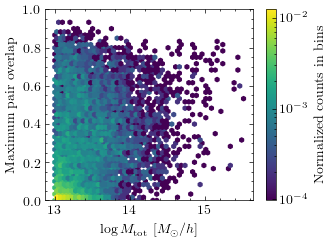

In [18]:
with plt.style.context(plt_utils.mplstyle):
    plt.figure()

    hb = plt.hexbin(x, y, mincnt=1, gridsize=50, bins="log")
    hexagon_counts = hb.get_array()
    normalized_counts = hexagon_counts / hexagon_counts.sum()
    hb.set_array(normalized_counts)
    hb.set_clim(normalized_counts.min(), normalized_counts.max())

    plt.colorbar(label="Normalized counts in bins")
    plt.xlabel(r"$\log M_{\rm tot} ~ [M_\odot / h]$")
    plt.ylabel("Maximum pair overlap")
    plt.ylim(0., 1.)

    plt.tight_layout()
    if to_save:
        fout = join(plt_utils.fout, f"mass_vs_max_pair_overlap{nsim0}.{ext}")
        print(f"Saving to `{fout}`.")
        plt.savefig(fout, dpi=plt_utils.dpi, bbox_inches="tight")
    plt.show()